<a href="https://colab.research.google.com/github/Malaika-05/AI-Training/blob/main/Week05_01(cw).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Required Libraries

pandas and numpy → Data manipulation

sklearn → ML models + evaluation

matplotlib & seaborn → Confusion matrix visualization

ENGLISH_STOP_WORDS → Remove common words

WordNetLemmatizer → Converts words to base form (run → running)

In [ ]:
import pandas as pd
import numpy as np
import re
import string

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Optional: lemmatization
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


Load Dataset & Inspect

Shows rows & columns → shape

Checks missing values → isnull().sum()

Counts class distribution → understand balance

In [ ]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")

# Display first 5 rows
df.head()

# Dataset shape
print("Dataset shape:", df.shape)

# Check null values
print("Null values:\n", df.isnull().sum())

# Class distribution
print("Class distribution:\n", df['class'].value_counts())

Dataset shape: (24783, 6)
Null values:
 count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
dtype: int64
Class distribution:
 class
1    19190
2     4163
0     1430
Name: count, dtype: int64


Create Binary Label

Classes 1 (hate speech) and 2 (offensive) → 1 (abusive)

Class 0 → 0 (non-abusive)

This is now ready for binary classification

In [ ]:
# Binary label: 1 → abusive (class 1 & 2), 0 → non-abusive (class 0)
df['binary_label'] = df['class'].apply(lambda x: 1 if x in [1,2] else 0)

# Check new distribution
df['binary_label'].value_counts()

,count
binary_label,
1,23353
0,1430


Text Preprocessing

Remove URLs, mentions, punctuation, numbers → Clean text

Lowercase → unify words

Stopwords → remove meaningless words

Lemmatization → reduce variations

clean_text column is ready for ML

In [ ]:
def preprocess_text(text):
    # Lowercase
    text = str(text).lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove @mentions
    text = re.sub(r'@\w+', '', text)

    # Remove hashtags (keep the word)
    text = re.sub(r'#', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenization & stopword removal
    words = text.split()
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]

    # Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]

    return " ".join(words)

# Apply preprocessing
df['clean_text'] = df['tweet'].apply(preprocess_text)

# Example before & after
print("Before:", df['tweet'][0])
print("After :", df['clean_text'][0])

Before: !!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
After : rt woman shouldnt complain cleaning house amp man trash


Feature Engineering – Bag of Words

Limitations of BoW:

Ignores word meaning & context

Treats all words equally

High-dimensional & sparse

In [ ]:
# Bag of Words
bow = CountVectorizer(max_features=5000)  # Limit vocab for performance
X_bow = bow.fit_transform(df['clean_text'])
y = df['binary_label']

# Display matrix shape & vocab size
print("BoW Matrix Shape:", X_bow.shape)
print("Vocabulary Size:", len(bow.vocabulary_))

BoW Matrix Shape: (24783, 5000)
Vocabulary Size: 5000


Feature Engineering – TF-IDF

Rare but meaningful words get higher weight → better ML performance

Usually improves accuracy over BoW

In [ ]:
# TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['clean_text'])

# Display matrix shape & vocab size
print("TF-IDF Matrix Shape:", X_tfidf.shape)
print("Vocabulary Size:", len(tfidf.vocabulary_))

TF-IDF Matrix Shape: (24783, 5000)
Vocabulary Size: 5000


Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

Train Models

Naive Bayes:

In [ ]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

Logistic Regression:

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

Naive Bayes → simple, fast, good for text

Logistic Regression → usually higher accuracy

Model **Evaluation**

In [ ]:
def evaluate(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred)
    }

# Evaluate models
nb_results = evaluate(y_test, y_pred_nb)
lr_results = evaluate(y_test, y_pred_lr)

print("Naive Bayes Results:", nb_results)
print("Logistic Regression Results:", lr_results)

Naive Bayes Results: {'Accuracy': 0.9421020778696793, 'Precision': 0.9424707307226484, 'Recall': 0.9995718261614215, 'F1': 0.9701818181818181}
Logistic Regression Results: {'Accuracy': 0.9404881985071616, 'Precision': 0.9470780547609318, 'Recall': 0.9922928709055877, 'F1': 0.9691583899634083}


Confusion Matrix (Logistic Regression)

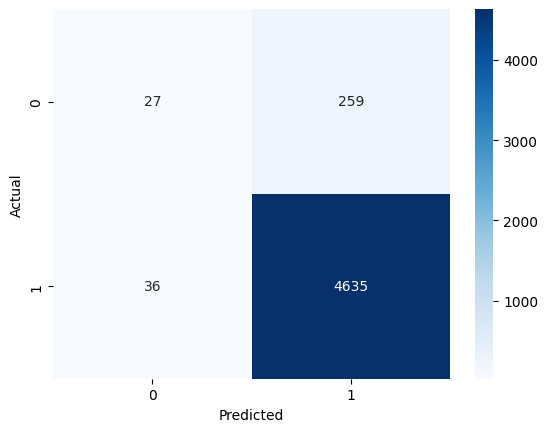

In [ ]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Save Cleaned Dataset

In [ ]:
df.to_csv("cleaned_abusive_dataset.csv", index=False)

| Feature | Method          | Classifier          | Accuracy | Precision | Recall | F1    |
| ------- | --------------- | ------------------- | -------- | --------- | ------ | ----- |
|
| TF-IDF  | TfidfVectorizer | Naive Bayes         | 0.942    | 0.942     | 0.999  | 0.970 |
| TF-IDF  | TfidfVectorizer | Logistic Regression | 0.940    | 0.947     | 0.992  | 0.969 |


**Short Conclusion**

Your conclusion should mention:

Dataset: Kaggle train.csv (24783 rows)

Preprocessing: Lowercase, punctuation/URL/mention removal, stopwords, lemmatization

Feature Engineering: BoW vs TF-IDF

Models: Naive Bayes & Logistic Regression

**Results:**

TF-IDF generally better than BoW

Logistic Regression slightly better on Precision

Naive Bayes very high Recall

Confusion matrix shows most abusive messages correctly predicted

Overall model performance is good (~94% Accuracy) for this task